# 금융 습관 분석을 통해 구독 해지율을 최소화시키기

구독 해지 가능성이 높은 유저들을 예측하여 관심있어하는 서비스를 제공함으로써 구독을 유지시키는 것이 목적이다.


금융 데이터는 신뢰도가 떨어지기 때문에 상품 관련 데이터로만 이용해서 분석을 한다.

# 목차

1. 데이터 읽기
2. 데이터 전처리
3. 데이터 시각화
    - 히스토그램
    - 파이 차트
    - 상관계수 그래프
4. 데이터 전처리 및 모델 학습
    - 원 핫 인코딩
    - k겹 교차 검증
        - 특성 선택
5. 모델 평가
    - 혼동 행렬
    - 분류성능평가지표
6. 결론

# 데이터 읽기

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


# 데이터 전처리

In [4]:
#결측치 위치 확인
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [5]:
#결측치 개수
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [6]:
# 결측치제거
dataset = dataset[pd.notnull(dataset['age'])]
# 결측치삭제
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

# 데이터 시각화

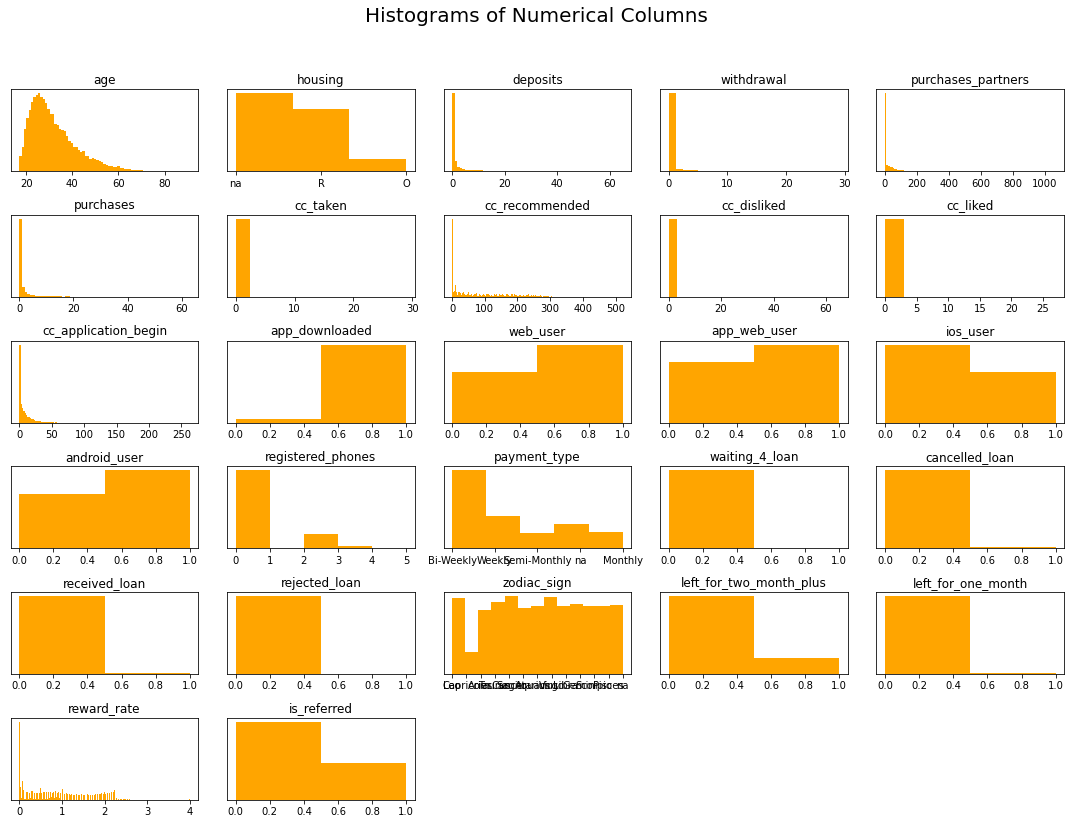

In [7]:
# 히스토그램
dataset2 = dataset.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20) #숫자 열의 히스토그램
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i) # 6행 * 5열
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False) # y라벨 제거
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

1. 연령 19세 이상으로 20대 주변부터 분포되어있다.
2. housing: 자택보유, 주택 임대, 불명 순으로 대부분 소유하고 있지 않다.

<ipython-input-8-32ee772b605b>:18: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels = index, autopct='%1.1f%%')


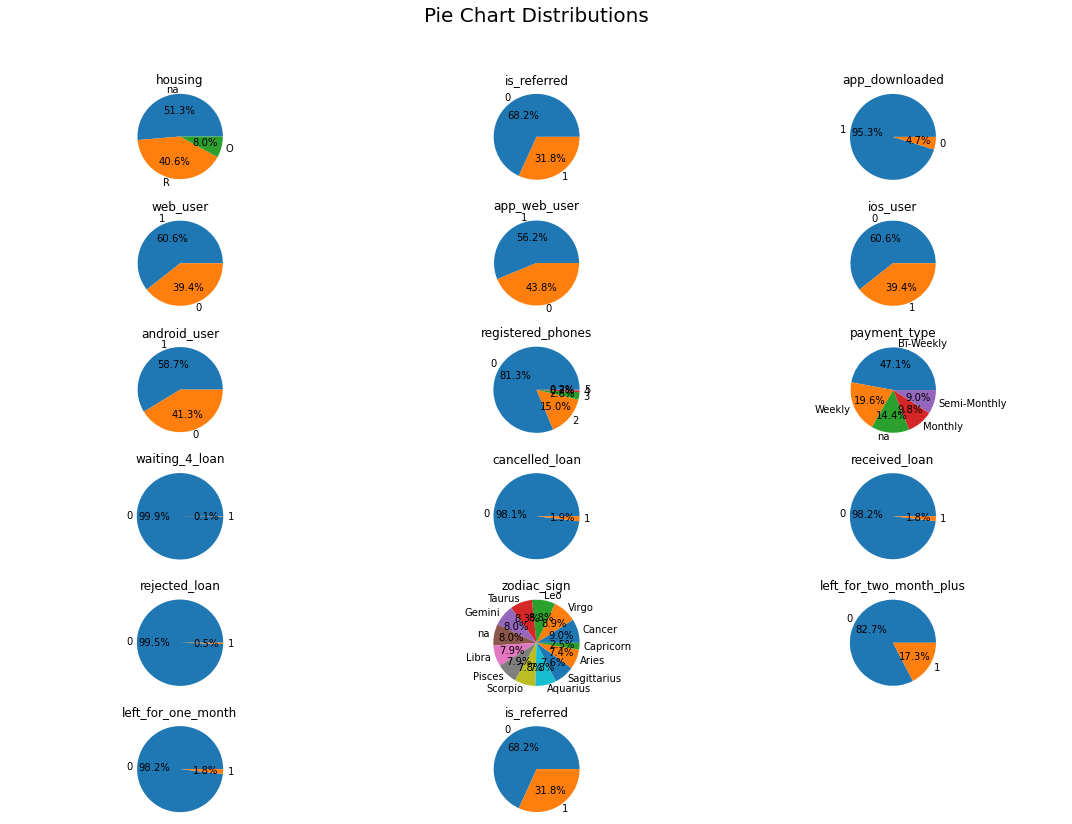

In [8]:
# 이진 변수들을 이용해서 파이차트 표현하기
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i) # 17개의 2진열
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:title={'center':'Correlation with Response variable'}>

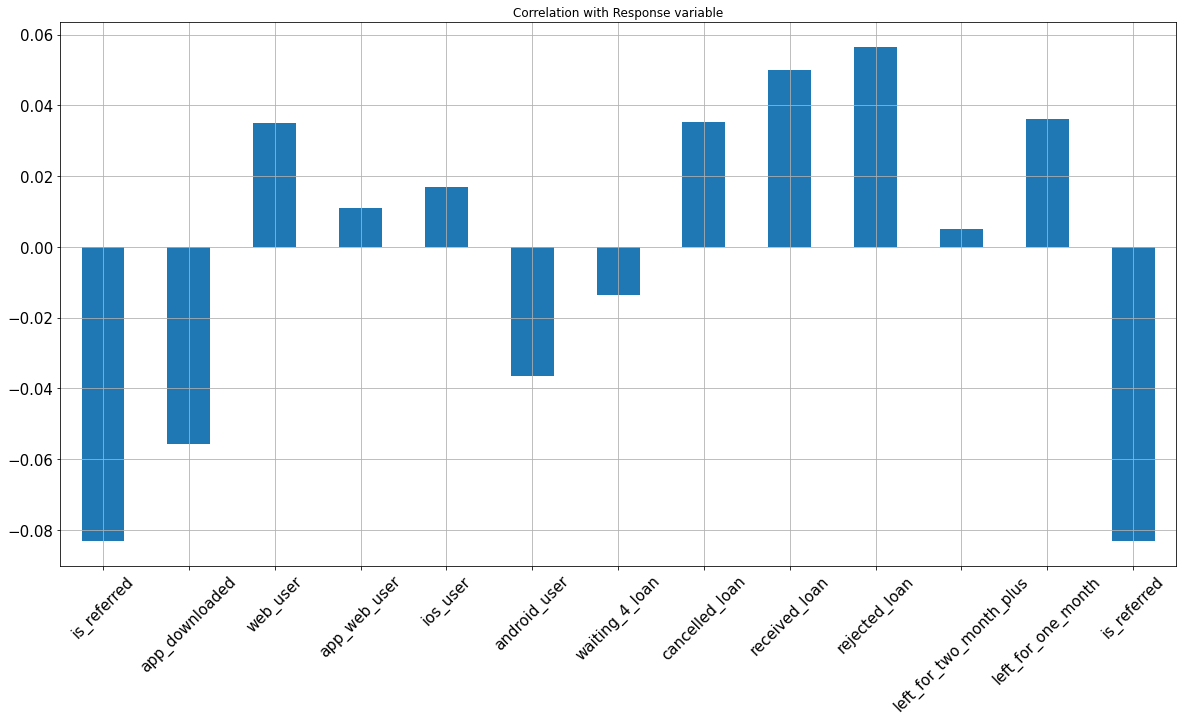

In [9]:
# 상관계수 그래프 (범주형 X, 이진 변수, 수치형 변수)
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign'] # 범주형 자료들 삭제
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

<ipython-input-10-18725e436a02>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

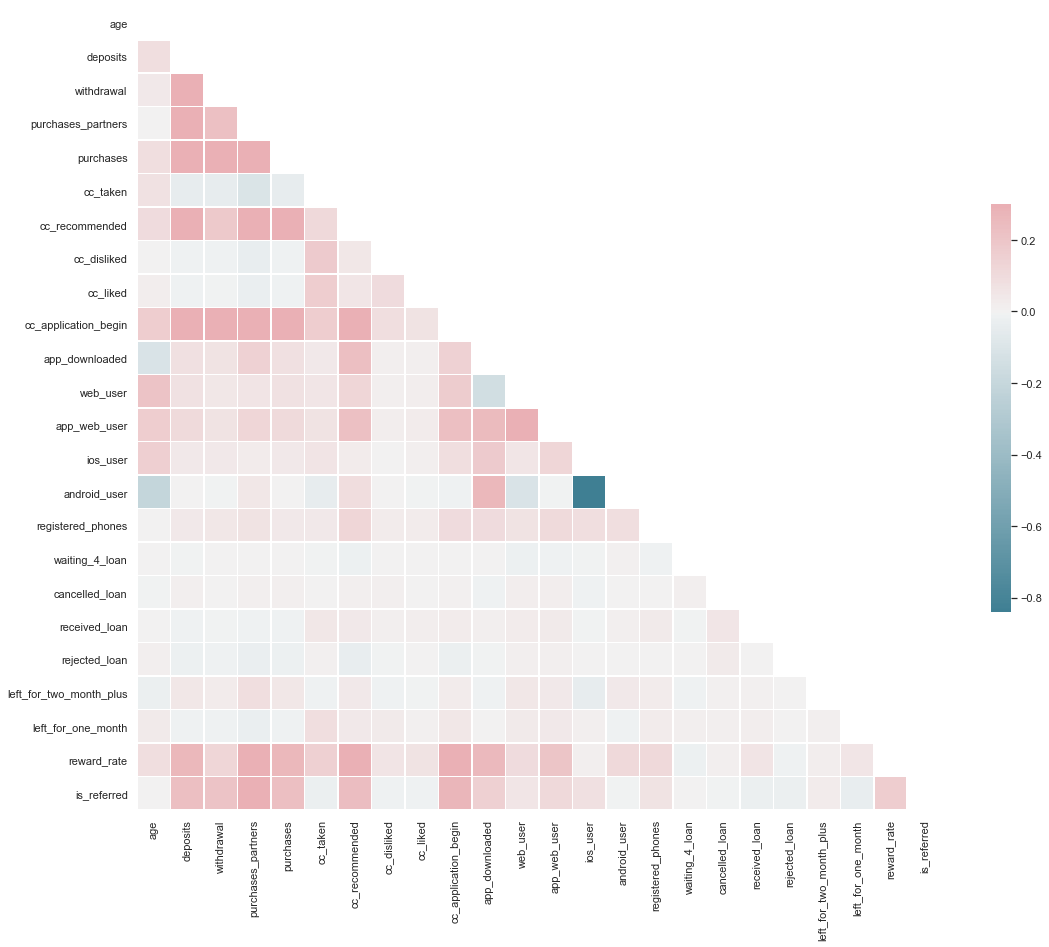

In [10]:
# 상관행렬: 독립된 필드간의 연관성을 보여주는 그래프
sn.set(style="white") # 배경 하얀색
corr = dataset.drop(columns = ['user', 'churn']).corr() #churn은 반응 변수이므로 제거

# 반토막내기
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
dataset = dataset.drop(columns = ['app_web_user'])
dataset.to_csv('new_churn_data.csv', index = False)

# 데이터 전처리 및 모델 학습

In [12]:
# 원 핫 인코딩: 범주형 변수들을 독립된 이진 열로 변화하는 과정 
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

dataset.housing.value_counts()
dataset.groupby('housing')['churn'].nunique().reset_index()
dataset = pd.get_dummies(dataset)
dataset.columns
# 상관관계가 이뤄지는 열들을 삭제
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [13]:
# 데이터가 불균형한 경우가 보이므로 데이터 밸런싱 작업을 한다.
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

# 데이터 정규화 작업
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [14]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) # 분류 모델
classifier.fit(X_train, y_train) # 모델 적합

y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3166
           1       0.52      0.74      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400

Test Data Accuracy: 0.6117


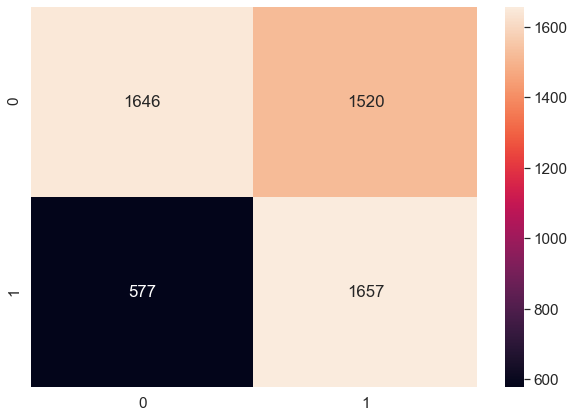

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

print(classification_report(y_test, y_pred))
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### 기초회귀분석 시간에 배웠던 k겹 교차 검증을 사용해보자.

In [17]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.644 (+/- 0.018)


In [18]:
# 상관계수 분류
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.157239
1,deposits,0.250349
2,withdrawal,0.053074
3,purchases_partners,-0.713884
4,purchases,-0.383932
5,cc_taken,0.113023
6,cc_recommended,0.055598
7,cc_disliked,-0.009411
8,cc_liked,-0.002940
9,cc_application_begin,0.013822


### 특성 선택

In [19]:
# 필요한 열의 양을 줄여서 속도를 빠르게 하며 기존 모델과 같은 수준의 정확도를 달성한다. 
from sklearn.feature_selection import RFE
classifier = LogisticRegression()

In [20]:
# 기존 데이터셋에는 40개의 열이 있는데 10개로 줄여본다.
rfe = RFE(classifier, 10)
rfe = rfe.fit(X_train, y_train)

print(rfe.ranking_) # 중요 열 우선도
sup = X_train.columns[rfe.support_] # 지원하는 열


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ 1  1  7  1  1  1  5 25 30 22 32  1  4 23  1 11  2  1  1  8 10  1 17  6
 15 12 14 13  3 18 27 29  9 16 24 20 26 31 19 21 28]


Test Data Accuracy: 0.6085
              precision    recall  f1-score   support

           0       0.74      0.51      0.60      3166
           1       0.52      0.75      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



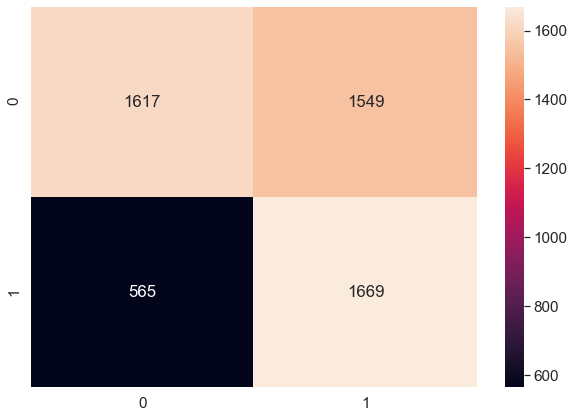

In [21]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[sup], y_train)

y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

비슷한 결과를 도출해냄으로써 순위 상위 10개의 열만 추출해낼 수 있다.

In [22]:
pd.concat([pd.DataFrame(sup, columns = ["features"]), pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],axis = 1)

,features,coef
0,age,-0.155536
1,deposits,0.288861
2,purchases_partners,-0.669422
3,purchases,-0.373357
4,cc_taken,0.127465
5,web_user,0.149161
6,registered_phones,0.111305
7,received_loan,0.106243
8,rejected_loan,0.144905
9,reward_rate,-0.143961


In [23]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
print(final_results)

       user  churn  predicted_churn
0     61353    1.0                1
1     67679    0.0                1
2     21269    0.0                0
3     69531    0.0                1
4     25997    0.0                0
...     ...    ...              ...
5395  22377    0.0                0
5396  24291    1.0                1
5397  23740    0.0                1
5398  47663    1.0                0
5399  52752    1.0                1

[5400 rows x 3 columns]


# 결론

약 61%의 정확도로 유저가 해지할 수 있는 경우를 예측했다.


그러나, 반응변수에 시간을 넣지 않았기 때문에 언제 해지할지는 모르는 것이 한계점이었다.


그래도 유저의 해지 가능성을 예측하여 집중 공략하도록 하는 부분에서 데이터를 얻었다는 것에 의의를 둔다.